In [18]:
# We use the NLP tools to pre-process the dataset before it is proceeded to the feature selection and training stage. 
# First, we use tokenization to divide the posts into individual tokens.
# Next, we remove all the URLs, punctuations and stop words which could lead into erratic results if stay ignored. 
# Then we apply stemming in order to reduce the words to their root form and group similar words together.

In [210]:
import os
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import bigrams, trigrams

import re, string
import contractions

import itertools
import collections
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kyeongbinkim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kyeongbinkim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [220]:
stopwords_set = stopwords.words("english")
# add_custom = ["add new words"]

In [228]:
dep_data_path = "./Identifying-depression/Data_Collector/reddit_depression/"
non_dep_data_path = "./Identifying-depression/Data_Collector/reddit_non_depression/"

data_path = dep_data_path
txt_list = os.listdir(data_path)

In [229]:
porter = PorterStemmer()
stemming = False #reduce the words to their root form

def sentence_preprocess(sentence):

    """""""""""""""""""""""""""
    Decontract the words in given sentence, and remove stopwords, URLs, and punctuations
    Also, reduce the words to their root form, if applicable 

    """""""""""""""""""""""""""

    extend_sentence = contractions.fix(sentence)
    token_words = word_tokenize(extend_sentence)
    # rm_stop_words = [word for word in token_words if not word.lower in stopwords_set]
    
    if stemming == True:
        filtered_words = [porter.stem(word) for word in token_words if word.lower() not in stopwords_set]
 
    else:
        filtered_words = [word.lower() for word in token_words if word.lower() not in stopwords_set]

    sentence = re.sub(r'http\S+', '', " ".join(filtered_words)) #remove url
    sentence = re.sub(r'[^\w\s]', '', sentence) #remove puntuation
    sentence = sentence.replace("  "," ")

    return sentence

In [230]:
txt_read = []
for txt_file in txt_list:
    with open(data_path+txt_file) as f:
        txt_sample =[line.strip() for line in f.readlines()]
    txt_read.append(" ".join(txt_sample))

processed_data = []
for sentence in txt_read:
    processed_data.append(sentence_preprocess(sentence))

print(f"# of posts: {len(processed_data)}")

one_string = ". ".join(processed_data)
terms_bigram = list(bigrams(one_string.split()))

bigrams_counts = collections.Counter(terms_bigram)
print("most common top-10 bigrams")
print(bigrams_counts.most_common(10))

returnVal = ["_".join(grams) for grams in terms_bigram]
bigram_one_string = " ".join(returnVal)

# of posts: 1293
most common top-10 bigrams
[(('feel', 'like'), 555), (('anyone', 'else'), 109), (('even', 'though'), 86), (('stop', 'stop'), 73), (('high', 'school'), 71), (('every', 'day'), 71), (('feels', 'like'), 69), (('first', 'time'), 63), (('get', 'better'), 62), (('wish', 'could'), 59)]


In [231]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(10, 8), dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close() 

# WordCloud for unigram
wordcloud = WordCloud(width = 2000, height = 1334, random_state=1, background_color='black', colormap='Pastel1', max_words = 75, collocations=False, normalize_plurals=False).generate(one_string)

# WordCloud for bigram
# wordcloud = WordCloud(width = 2000, height = 1334, random_state=1, background_color='black', colormap='Pastel1', max_words = 75, collocations=False, normalize_plurals=False).generate(bigram_one_string)

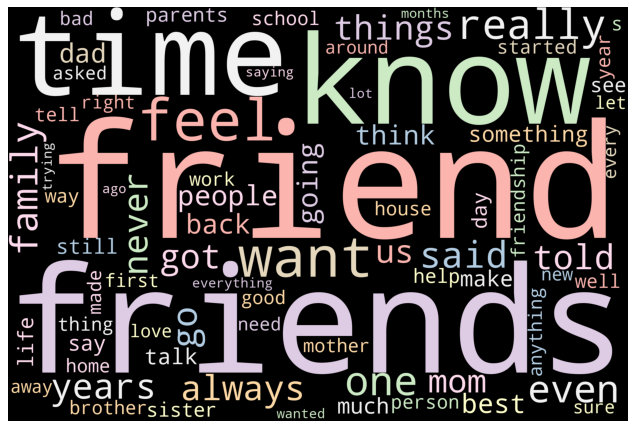

In [227]:
plot_cloud(wordcloud) #unigram non-depressed

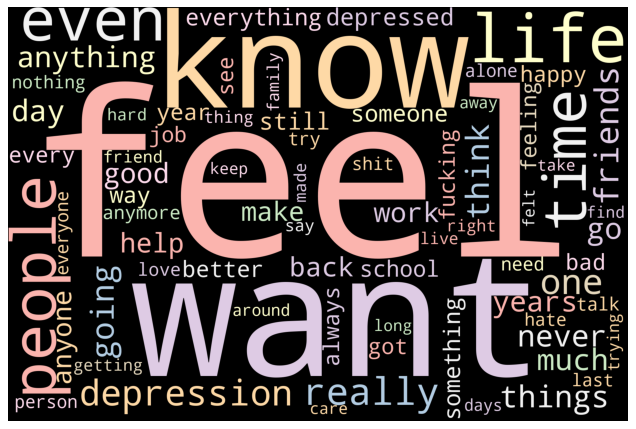

In [232]:
plot_cloud(wordcloud) #unigram depressed

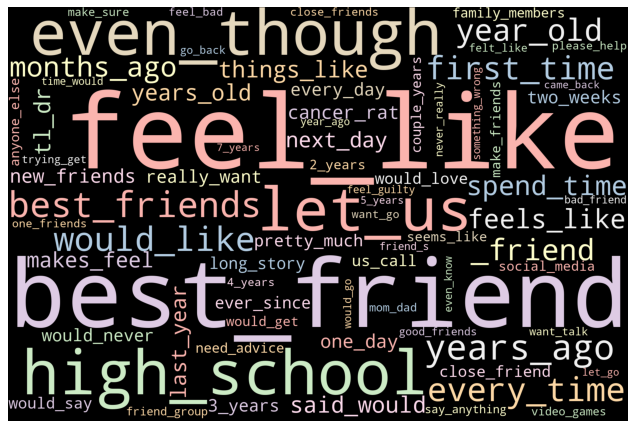

In [225]:
plot_cloud(wordcloud) #bigram non-depressed

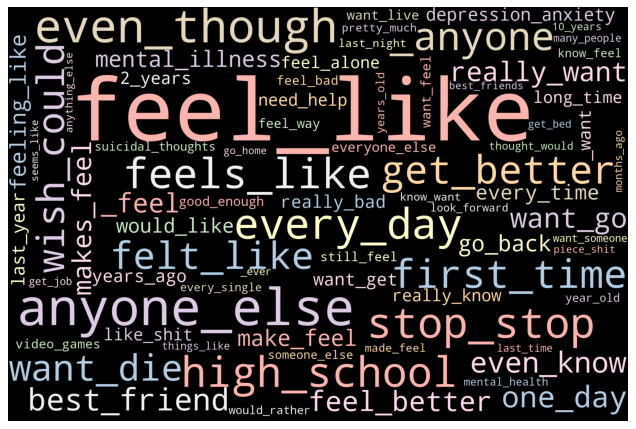

In [216]:
plot_cloud(wordcloud) #bigram depressed